======================================
# Milestones 1 - Customer Churn Analysis

Nama : Devi Nirfana Hermawan <br>
Batch : HCK 016 

Data Source : [Kaggle.com](<https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn>)  <br>
Tableau Dashboaard : [Dashboard](<https://public.tableau.com/views/CustomerChurnAnalysis_17152608950240/CountofcomplainperSatisfactionScore?:language=en-GB&publish=yes&:sid=&:display_count=n&:origin=viz_share_link>)


This is a milestone project to simulate a data analyst task in real world, all the name and data inside this notebook is just a fictional scenario.

======================================

# A. Introduction

DigiBank, a leading private digital bank, has been experiencing a worrying trend: a steady rise in customer churn. The marketing department is feeling the heat, with the Marketing Manager increasingly concerned about the impact on revenue and brand reputation. As a data analyst at DigiBank, I have been tasked with leading a customer churn analysis project. The marketing department needs a clear understanding of why customers are leaving DigiBank. They want actionable insights that can be used to develop targeted retention strategies.

# B. Business Understanding & Problem Statement

**Using SMART Framework** <br>
**`Spesific`** : <br>
The objective of reducing customer churn and improving retention rates within the digital bank's customer base. <br>

**`Measurable`** : <br>
Aim to achieve a 5% reduction in churn rate every quarter, with a cumulative decrease of 20% by the end of the year.

**`Achieveble`** : <br>
Diversify strategies beyond loyalty programs, including enhancing product offerings and personalized offers. Prioritize customer satisfaction and long-term relationships to drive revenue growth and reduce acquisition costs.

**`Relevant`** : <br>
Decreasing customer churn can lead into higher revenue and reducing cost for getting new customer.

**`Time-bound`** : <br>
Launch the loyalty program within the next three months, conduct monthly evaluations, and review overall progress every quarter.


**Problem Statement**: <br>
achieve a 5% reduction in churn rate each quarter, culminating in a cumulative decrease of 20% by the year's end. Not only relevant for fostering long-term customer satisfaction and loyalty but also crucial for driving revenue growth and curbing acquisition costs. 

# C. Problem Breakdown 

This questions below are going to be answered during the analysis.
1. What is the average age of customers? Average age of exited and not exited? 
2. What's the percentage of churn by gender?
3. Are actively engaged customers more likely to have credit cards?
4. What is the percentage of customers who have a credit card and are also active members of the bank?
5. What is the breakdown of credit card types for customers who have filed a complain?
6. Are customers who filed complains more likely to exit the bank?
7. Does customer satisfaction score correlate with the likelihood of filing a complain?
8. Does Salary correlate with number of product own by customer?



# D. Data loading 

In [ ]:
# import library 
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
df = pd.read_csv('Customer-Churn-Records.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

**Table Description** <br>

| Column Name | Description |
| --- | --- |
| `RowNumber` | Corresponds to record number, not shown in output |
| `CustomerId` | Random customer identifier |
| `Surname` | Customer's last name |
| `CreditScore` | Customer's credit score |
| `Geography` | Customer's location |
| `Gender` | Customer's gender | Potentially |
| `Age` | Customer's age |
| `Tenure` | Years as a bank client |
| `Balance` | Account balance |
| `NumOfProducts` | Number of bank products purchased |
| `HasCrCard` | Has credit card (Yes/No) |
| `IsActiveMember` | Actively uses bank services (Yes/No) |
| `EstimatedSalary` | Estimated customer salary |
| `Exited` | Left the bank (Yes/No) |
| `Complain` | Filed a complain (Yes/No) |
| `Satisfaction Score` | Score for complain resolution |
| `Card Type` | Type of credit card (if applicable) |
| `Points Earned` | Credit card points earned |

# E. Data preparation

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
# Check for duplicates 
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

Based on the output provided, the data is clean, with all columns formatted appropriately, no missing values and no duplicated data. But before going to the analysis Phase. We are going to change the value of 0 and 1 in columns `HasCrCard`, `IsActiveMember`, `Exited` and `Complain`, 1 == Yes and 0 == No.

In [ ]:
df[['HasCrCard', 'IsActiveMember', 'Exited', 'Complain']] = df[['HasCrCard', 'IsActiveMember', 'Exited', 'Complain']].replace(0, 'No').replace(1, 'Yes')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes,Yes,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No,Yes,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes,Yes,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,No,No,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No,No,5,GOLD,425


Before we explore the data, unused column such as `RowNumber`, `CustomerId` and `surname` will be dropped.

In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace= True)

# F. Data Analysis

##  Numerical Data Descriptions

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Satisfaction Score,10000.0,3.013800,1.405919,1.00,2.00,3.000,4.0000,5.00
Point Earned,10000.0,606.515100,225.924839,119.00,410.00,605.000,801.0000,1000.00


Based on the data above we can see that the average satisfaction rate is 3, and the average tenure of customer is 5 years. 

## 1. What is the average age of customers? Average age of exited and not exited?

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


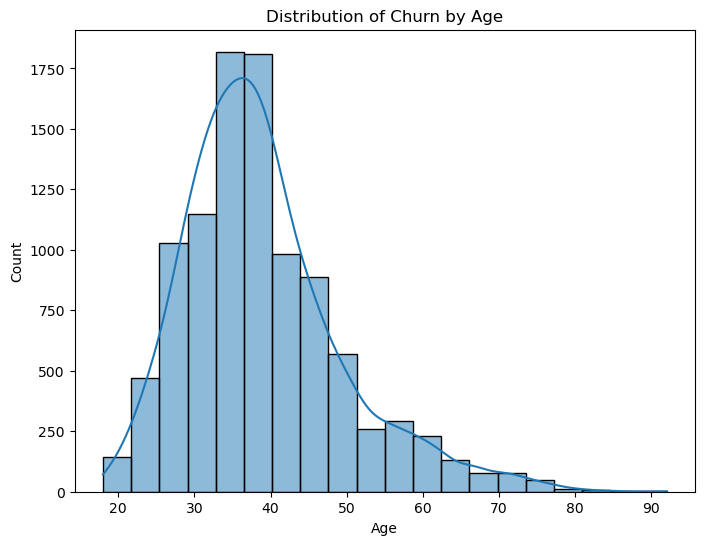

In [ ]:
# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Churn by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
# average age of customer 
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

The average of customer age is 38.9 years old, with the youngest customer is 18 years old, and the older customer recorded is 92 years old.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a

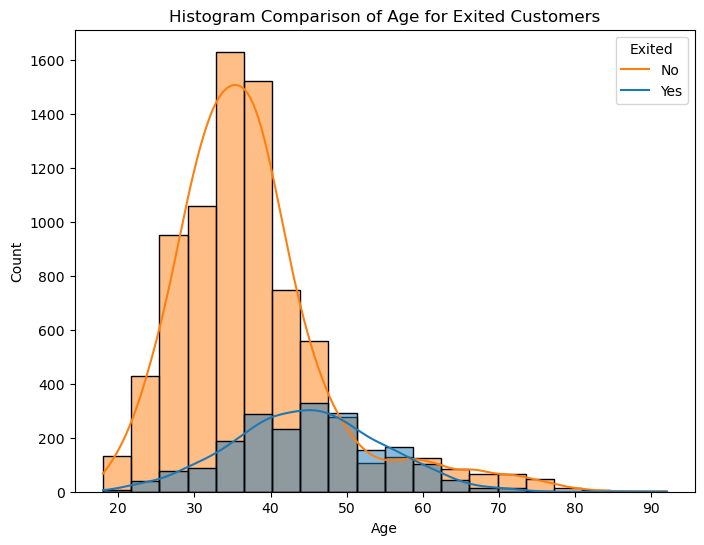

In [ ]:
# create comparation histogram
plt.figure(figsize=(8, 6))
sns.histplot(df, x='Age', hue='Exited', bins=20, kde=True)
plt.title('Histogram Comparison of Age for Exited Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['No', 'Yes'])

plt.show()

In [ ]:
# Average age of customer churn
df.groupby('Exited')['Age'].mean().reset_index()

,Exited,Age
0,No,37.408063
1,Yes,44.835623


The last histogram show that customer above 40 years old in likely to exit from the bank.

## 2. What's the percentage of churn by gender?

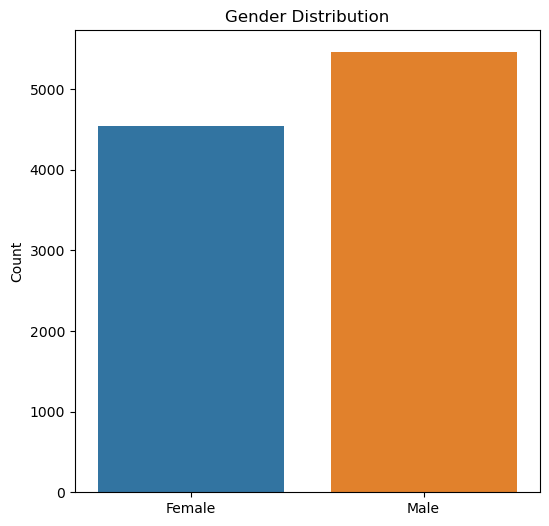

In [ ]:
# create bar chart
plt.figure(figsize=(6, 6))
sns.countplot(df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel(None)
plt.ylabel('Count')

plt.show()

In [ ]:
# create reusable function
def calculate_percentage(x):
    return (x / x.sum()) * 100

# grouping data and calculate percentage
gender_churn = df.groupby('Gender')['Exited'].value_counts().pipe(calculate_percentage).reset_index(name = 'percentage')
gender_churn

,Gender,Exited,percentage
0,Female,No,34.04
1,Female,Yes,11.39
2,Male,No,45.58
3,Male,Yes,8.99


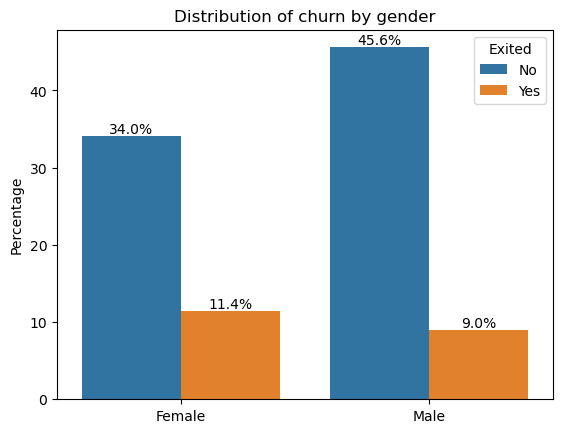

In [ ]:
# create bar chart
ax = sns.barplot(data=gender_churn, y='percentage', x='Gender', hue='Exited')
plt.xlabel(None)
plt.ylabel('Percentage')
plt.legend(title='Exited')
plt.title('Distribution of churn by gender')

# adding label on each bar 
for label in ax.patches:
    ax.annotate(f'{label.get_height():.1f}%', 
                (label.get_x() + label.get_width() / 2., label.get_height()),
                ha='center', va='center', fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()

Based on the bar chart, female customers have a higher proportion of customers who have exited the bank approximately 11.4% of total customer.

## 3. Are actively engaged customers more likely to have credit cards?

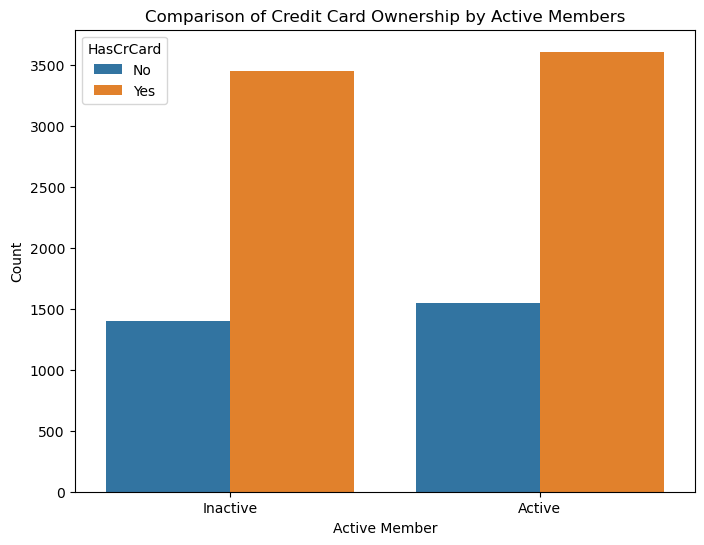

In [ ]:
# grouping data and renaming value
activeCust_CrCard = df.groupby(['IsActiveMember', 'HasCrCard']).size().reset_index(name='Count').copy()
activeCust_CrCard['IsActiveMember']= activeCust_CrCard['IsActiveMember'].str.replace('Yes', 'Active').str.replace('No', 'Inactive')


# Plot comparison using a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(activeCust_CrCard, x='IsActiveMember', y='Count', hue='HasCrCard')
plt.title('Comparison of Credit Card Ownership by Active Members')
plt.xlabel('Active Member')
plt.ylabel('Count')

plt.show()

In [ ]:
activeCust_CrCard.head()

,IsActiveMember,HasCrCard,Count
0,Inactive,No,1401
1,Inactive,Yes,3448
2,Active,No,1544
3,Active,Yes,3607


Based on the provided data, we cannot conclusively state that actively engaged customers are more likely to have credit cards compared to non-active customers. Both groups have a high proportion of customers with credit cards, with a slightly higher percentage observed among non-active customers.

## 4. What is the percentage of customers who have a credit card but inactive members of the bank?

In [ ]:
credit_card_inactive_members = df.query("IsActiveMember == 'No'")['HasCrCard'].value_counts().pipe(calculate_percentage).reset_index(name = 'percentage')
credit_card_inactive_members 

,HasCrCard,percentage
0,Yes,71.107445
1,No,28.892555


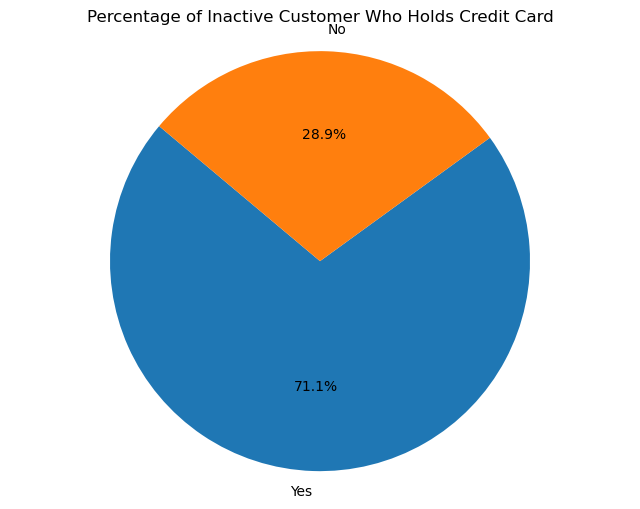

In [ ]:
# create pie chart
plt.figure(figsize=(8, 6))
plt.pie(credit_card_inactive_members['percentage'], labels = credit_card_inactive_members['HasCrCard'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Inactive Customer Who Holds Credit Card')
plt.axis('equal') 

plt.show()

The pie chart provides the distribution of credit card ownership among customers who are not active members. It indicates that a significant majority (approximately 71.11%) of inactive customers still have a credit card, while a smaller proportion (approximately 28.89%) do not.

## 5. What is the breakdown of credit card types for customers who have filed a complain?

In [ ]:
complain_customers = df[df['Complain'] == 'Yes'].value_counts('Card Type').pipe(calculate_percentage).reset_index(name = 'percentage')
complain_customers 

,Card Type,percentage
0,DIAMOND,26.761252
1,PLATINUM,25.000000
2,SILVER,24.559687
3,GOLD,23.679061


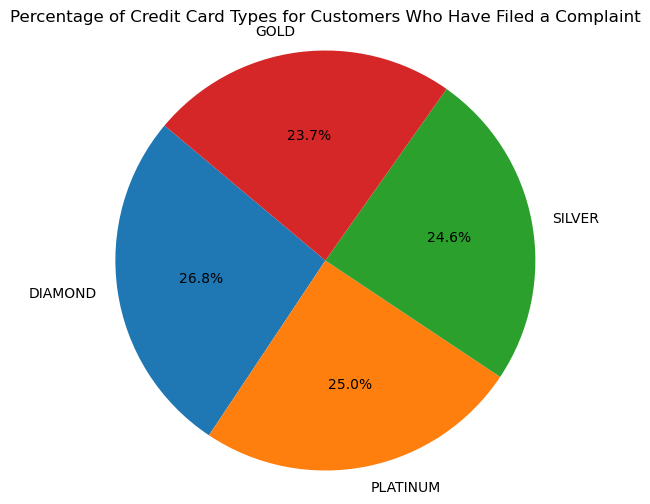

In [ ]:
# create pi chart
plt.figure(figsize=(8, 6))
plt.pie(complain_customers['percentage'], labels=complain_customers['Card Type'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Credit Card Types for Customers Who Have Filed a complain')
plt.axis('equal') 

plt.show()

The pie chart provides the distribution of card types among customers who have filed a complain. It shows that there is a relatively balanced distribution of card types among customers who have filed complains, with no single card type dominating the distribution.

## 6. Are customers who filed complains more likely to exit the bank?

In [ ]:
# calculate percentage 
complains_exited = df[df['Complain'] == 'Yes'].value_counts('Exited').pipe(calculate_percentage).reset_index(name = 'percentage')
complains_exited 

,Exited,percentage
0,Yes,99.510763
1,No,0.489237


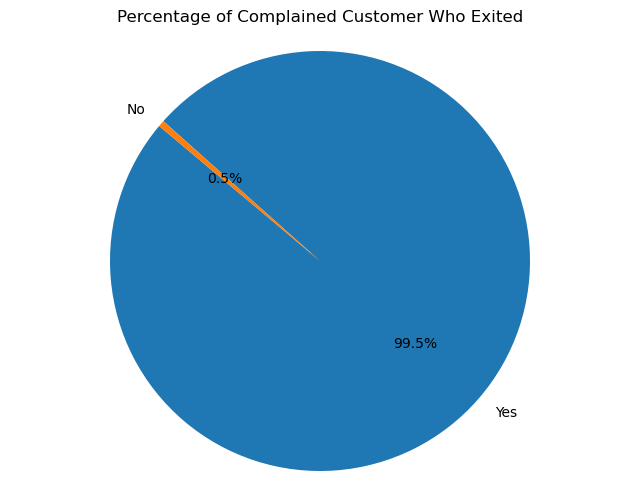

In [ ]:
# Create pychart using matplotlib
plt.figure(figsize=(8, 6))
plt.pie(complains_exited['percentage'], labels=complains_exited['Exited'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Complained Customer Who Exited')
plt.axis('equal') 

plt.show()

Based on the pie chart, the majority of customers who filed a complain have exited the bank, indicating a high of churn or attrition among customers who express dissatisfaction through complains.

## 7. Does customer satisfaction score correlate with the possibility of filing a complain?

To do this correlation test, first we are going to set the hypothesis null and the alternative:

**`H0`** : There is no correlation between customer satisfaction score and the possibility of filing a complain. <br>
**`H1`** : There is a correlation between customer satisfaction score and the possibility of filing a complain.

In this analysis, since both columns of interest are categorical, we will employ the Chi-Square test.

In [ ]:
# create observation table 
contingency_table = pd.crosstab(df['Satisfaction Score'],df['Complain'])

# perform chi square test
res = stats.chi2_contingency(contingency_table)

print("P-value:", res.pvalue)

P-value: 0.5559756516610992


**P-value**: 0.5559756516610992

Since the p-value is greater than 0.05, we fail to reject the null hypothesis.

There is no chance that satisfaction score having relation to the possibility of filling complain.

## 8. Does Salary correlate with number of product own by customer?

This question being asked to help the marketing team build better marketing strategy. Here is the hypothesis: <br>
**`H0`** : There is no correlation between customer's salary and the number of product. <br>
**`H1`** : There is a correlation between customer's salary and the number of product.

In this analysis, we'll use ANOVA. Because we're going to compare means between more than 2 groups.

In [ ]:
# groupiong the data
groups = []
for num_products, group_df in df.groupby('NumOfProducts'):
    groups.append(group_df['EstimatedSalary'])
    

res = stats.f_oneway(*groups)

print("P-value:", res.pvalue)

P-value: 0.46206337047894386


**P-Value**: 0.46206337047894386

Since the p-value is greater than 0.05, we fail to reject the null hypothesis.

There is no chance that customer's salary having correlation with number of products.

# G. Conclusion

After doing the analysis we can see that the average customer satisfaction is 3, this indicates that there are so many things need to be done to restore the banks branding and services. 
There is a trend that show customers more 40 years old is likely to exited from the banks, and female customers have a higher proportion of customers who have exited the bank approximately 11.4% of total customer while male customer is only 9% of total customer. 

Both groups of active and inactive customer have a high proportion of customers with credit cards, with a slightly higher percentage observed among non-active customers. There are approximately 71.1% of inactive customer who has credit card.

There is a relative balanced distribution of card types among customer who have filled complains, and there's no single card type dominating the distribution.

Apparently a high percentage of complained customer who exited is high up to 99.5%, this number is indicating a high churn or attrition among customers who express dissatisfaction through complains. To test if there is a correlation between customer satisfaction and possibility of filling complain, we do a Chi-Square test and get result p-value is higher that the critical value, which means there's no correlation between satisfaction score and complain.

To build a better marketing strategy another test is run to see if there is a correlation between customer's estimated salary and number of products they hold, this test use ANOVA technique and get the result p-value is higher than critical value, so there is no correlation between customer's salary and number of products they hold.

# H. Recommendation
1. **Enhance Customer Satisfaction**
This could be done by improving overall services to customer, especially if they are filling complain. Use customer's complain as feedback to improve a service to be customer oriented.
2. **Address Complain Resolution**
Implement proactive complain resolution mechanisms, streamline processes for addressing customer grievances, and prioritize swift and effective resolution to mitigate churn and salvage customer relationships.
3. **Optimize Credit Card Usage Among Customer**
Create a campaign to encourage customer use their credit card more often, focusing on benefits, rewards, and personal offer especially to inactive customers.
4. **Align Product Offering with Customer Segmentation**
By customizing the product offer to be more personal to customer, also offer product and service based on their financial capabilities and preferences.
5. **Continuously Measure and Refine Strategy**
Monitor and evaluate marketing strategy and the impact on KPI. Track customer satisfactions, revenue and product sold, this would allow agile adjustments for optimizing marketing initiatives over time.